# Overview
This notebook is a step by step to calculate the degrees from semi-circular trajectory data

## Steps
* grab the first point in the trajectory data 512 551 #(964, 480)
* reverse the datapoints
* grab the last point in the trajectory data and loop through every trial
* convert the origin 720 615 to (0,0) - which will give you an updated coordinate
* using this updated coordinate, transfor it to polar coordinates, which will give you the degree of the data point
* load data
* add subject number
* extract relevant columns
* concat data, axis 0
* average degree

## libraries

In [1]:

%matplotlib inline

import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import loggamma
from scipy.stats import johnsonsu
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.stats import frechet_l
from scipy.special import gamma as gammaf
import warnings
import scipy.stats as st
import statsmodels as sm
import seaborn as sns

## seaborn style

In [2]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

## function - cartesian to polar coordinates

In [3]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

# [ Cognitive ]

In [4]:
sublist = [1,2,3,4,5,6,7,8,9,10,11,12,15,16,19,25,26,27,28]
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis'
# metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-cognitive_meta_beh.csv'

df = pd.DataFrame()
result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  os.path.join(main_dir , 'boulder', 'beh_withcoord', 
                                 'sub-' + str(('%04d' % sub)), 'sub-' + str(('%04d' % sub)) + '_task-cognitive_meta_beh.csv')
    df = pd.read_csv(loadfilename)
    df['sub_num'] = sub
    result = pd.concat([result, df], axis = 0, sort = True)

In [5]:
# step 3 - subtract mid point ________________________________________________________________________

result['new_ptb_coord_x'] = abs(result['ptb_coord_x'] - 512)
result['new_ptb_coord_y'] = abs(result['ptb_coord_y'] - 551)

result['r'], result['theta'] = cart2pol(result['new_ptb_coord_x'], result['new_ptb_coord_y'])

In [34]:
result['new_ptb_coord_x']

0     241
1     235
2     226
3     239
4     243
5     117
6     248
7     155
8     248
9       5
10    249
11    237
12    248
13    240
14    249
15    217
16    193
17     42
18    109
19     61
20     65
21    221
22    180
23    249
24    250
25    207
26     39
27    198
28    225
29    248
     ... 
6     237
7     246
8     232
9     248
10    229
11    183
12    249
13    249
14    248
15    247
16    249
17    241
18    227
19    248
20    247
21    135
22    242
23    168
24    241
25    244
26    243
27    111
28    249
29    130
30    250
31    209
32    242
33    247
34    136
35    198
Name: new_ptb_coord_x, Length: 684, dtype: int64

In [6]:
result.head()

,Unnamed: 0,p1_fixation_duration,p1_fixation_onset,p2_cue_filename,p2_cue_onset,p2_cue_type,p3_expect_RT,p3_expect_onset,p3_expect_responseonset,p4_fixation_duration,...,param_fmriSession,param_runNum,param_triggerOnset,ptb_coord_x,ptb_coord_y,sub_num,new_ptb_coord_x,new_ptb_coord_y,r,theta
0,0,1.401260,14475.639456,h018.png,14477.058758,high,14478.107476,14478.083727,2.596011,0.600252,...,1,2,14472.77088,741,546,1,229,5,229.054579,0.021831
1,1,2.900365,14493.429827,l056.png,14496.351162,low,14497.371951,14497.361815,NaN,0.600512,...,1,2,14472.77088,759,517,1,247,34,249.329100,0.136792
2,2,2.800418,14512.577563,l029.png,14515.397846,low,14516.418857,14516.408240,NaN,0.800517,...,1,2,14472.77088,285,488,1,227,63,235.580135,0.270720
3,3,0.400471,14531.816737,l041.png,14532.232430,low,14533.253136,14533.242795,NaN,0.300509,...,1,2,14472.77088,512,551,1,0,0,0.000000,0.000000
4,4,0.400768,14548.162381,h021.png,14548.581301,high,14549.604782,14549.592525,NaN,0.201012,...,1,2,14472.77088,510,551,1,2,0,2.000000,0.000000


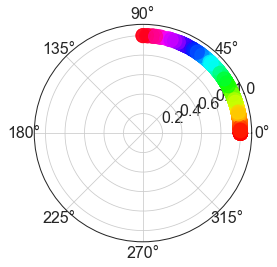

In [8]:
# Compute areas and colors

colors = result['theta']
result['newr'] = np.ones(result.r.shape)
area = 200 * result['newr']**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(result['theta'], result['newr'], c=colors, s=area, cmap='hsv', alpha=0.75)


## plot raw form

Text(0.5, 0.8, 'Cognitive task\n rating on semi-circular scale')

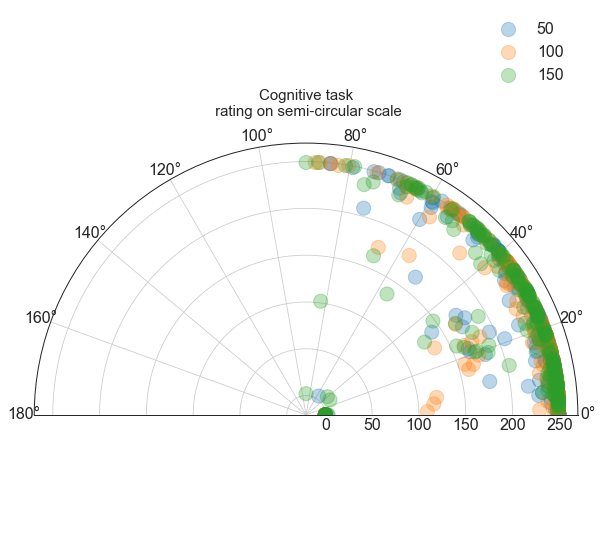

In [10]:

# area = 200 * result['newr']**2
area = 200 * result['newr']**2

groups = result.groupby('p5_administer_type')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Cognitive task\n rating on semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

## plot by rotation degrees

Text(0.5, 0.8, 'Cognitive task\n rating on semi-circular scale per degree')

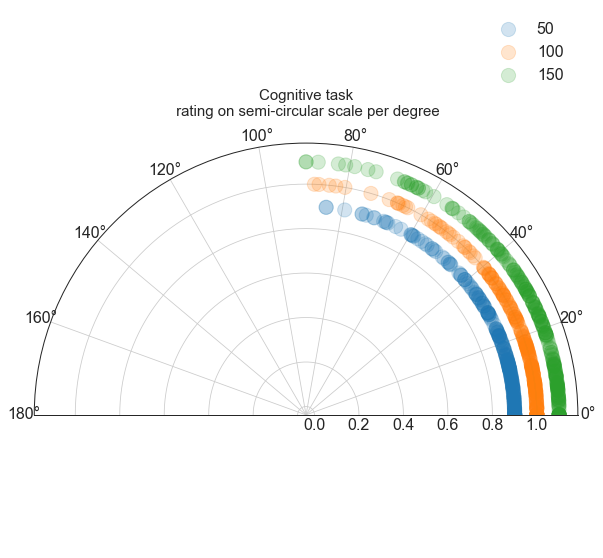

In [11]:
# Compute areas and colors

colors = result['theta']
result['newr'] = np.ones(result.r.shape)

area = 200 * result['newr']**2

# groups = result.groupby('administer')
group50 = result[result['p5_administer_type'] ==50]
group100 = result[result['p5_administer_type'] ==100]
group150 = result[result['p5_administer_type'] ==150]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
p50 = ax.scatter(group50.theta, np.ones(group50.newr.shape)*0.9,label=50, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p100 = ax.scatter(group100.theta, np.ones(group100.newr.shape),label=100, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p150 = ax.scatter(group150.theta, np.ones(group150.newr.shape)*1.1,label=150, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
figure_title = "Cognitive task\n rating on semi-circular scale per degree"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

## participant mean

In [12]:
group_mean = result.groupby(['p5_administer_type','sub_num']).mean().reset_index()

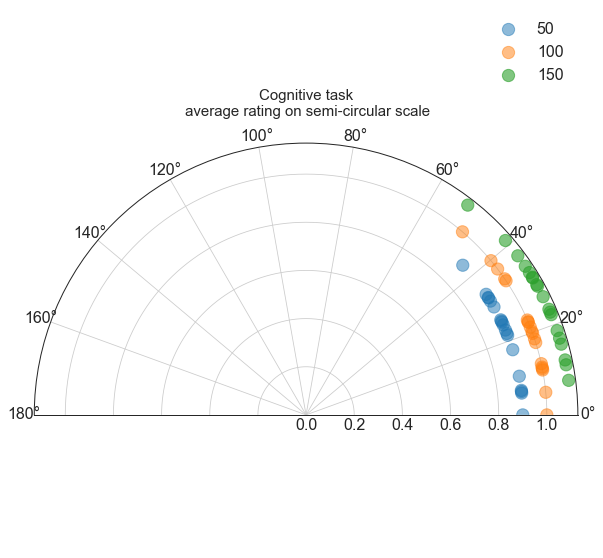

In [13]:

colors = group_mean['theta']
group_mean['newr'] = np.ones(group_mean.r.shape)
# area = 200 * result['newr']**2
area = 150 * group_mean['newr']**2


# groups = group_mean.groupby('administer')

group_mean_50 = group_mean[group_mean['p5_administer_type'] ==50]
group_mean_100 = group_mean[group_mean['p5_administer_type'] ==100]
group_mean_150 = group_mean[group_mean['p5_administer_type'] ==150]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
# for name, group in groups:
#     ax.scatter(group.theta, group.newr_random,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# ax.legend()
#  marker='o', linestyle='', ms=12,
figure_title = "Cognitive task\n average rating on semi-circular scale"
plt.text(0.5,0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)


p50 = ax.scatter(group_mean_50.theta, np.ones(group_mean_50.newr.shape)*0.9,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p100 = ax.scatter(group_mean_100.theta, np.ones(group_mean_100.newr.shape),label=100, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p150 = ax.scatter(group_mean_150.theta, np.ones(group_mean_150.newr.shape)*1.1,label=150, alpha=0.60, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

# [ Vicarious ]

In [20]:
sublist = [1,2,3,4,5,6,7,8,9,10,11,12,15,16,19,25,26,27,28]
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis'
# metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-cognitive_meta_beh.csv'

df = pd.DataFrame()
result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  os.path.join(main_dir , 'boulder', 'beh_withcoord', 
                                 'sub-' + str(('%04d' % sub)), 'sub-' + str(('%04d' % sub)) + '_task-vicarious_meta_beh.csv')
    df = pd.read_csv(loadfilename)
    df['sub_num'] = sub
    result = pd.concat([result, df], axis = 0, sort = True)

In [21]:
# step 3 - subtract mid point ________________________________________________________________________

result['new_ptb_coord_x'] = abs(result['ptb_coord_x'] - 512)
result['new_ptb_coord_y'] = abs(result['ptb_coord_y'] - 551)

result['r'], result['theta'] = cart2pol(result['new_ptb_coord_x'], result['new_ptb_coord_y'])

In [22]:
result.head()

,Unnamed: 0,p1_fixation_duration,p1_fixation_onset,p2_cue_filename,p2_cue_onset,p2_cue_type,p3_expect_RT,p3_expect_onset,p3_expect_responseonset,p4_fixation_duration,...,param_triggerOnset,param_videoFilename,param_videoSubject,ptb_coord_x,ptb_coord_y,sub_num,new_ptb_coord_x,new_ptb_coord_y,r,theta
0,0,0.808867,13559.066245,h041.png,13559.907388,high,3.399968,13560.990640,13564.390631,0.815150,...,13556.151355,dr052t2aaaff_M.mp4,052-dr052,271,500,1,241,51,246.337167,0.208542
1,1,4.015578,13576.574215,l025.png,13580.622796,low,2.816687,13581.656083,13584.472791,1.215478,...,13556.151355,jk103t1aaunaff_L.mp4,103-jk103,277,539,1,235,12,235.306184,0.051020
2,2,0.914306,13597.474272,h024.png,13598.405067,high,2.366500,13599.438430,13601.804951,0.115430,...,13556.151355,bg096t1aeaff_H.mp4,096-bg096,286,476,1,226,75,238.119718,0.320423
3,3,1.115578,13614.155288,l031.png,13615.287406,low,2.366806,13616.320691,13618.687499,0.815963,...,13556.151355,dn124t1aaunaff_L.mp4,124-dn124,273,508,1,239,43,242.837394,0.178012
4,4,4.014837,13631.738548,h022.png,13635.786170,high,2.666475,13636.819520,13639.485997,0.613807,...,13556.151355,jh043t2aaunaff_L.mp4,043-jh043,269,551,1,243,0,243.000000,0.000000


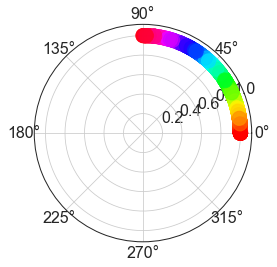

In [23]:
# Compute areas and colors

colors = result['theta']
result['newr'] = np.ones(result.r.shape)
area = 200 * result['newr']**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(result['theta'], result['newr'], c=colors, s=area, cmap='hsv', alpha=0.75)


## plot raw form

Text(0.5, 0.8, 'Vicarious task\n rating on semi-circular scale')

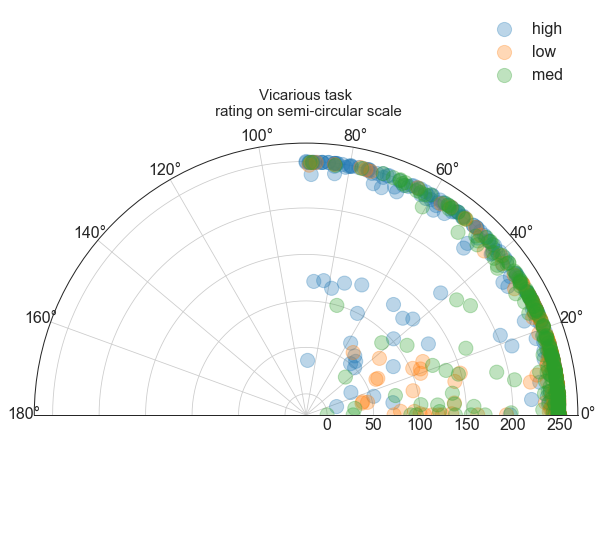

In [24]:

# area = 200 * result['newr']**2
area = 200 * result['newr']**2

groups = result.groupby('param_administer_type')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Vicarious task\n rating on semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

## plot by rotation degrees

Text(0.5, 0.8, 'Vicarious task\n rating on semi-circular scale per degree')

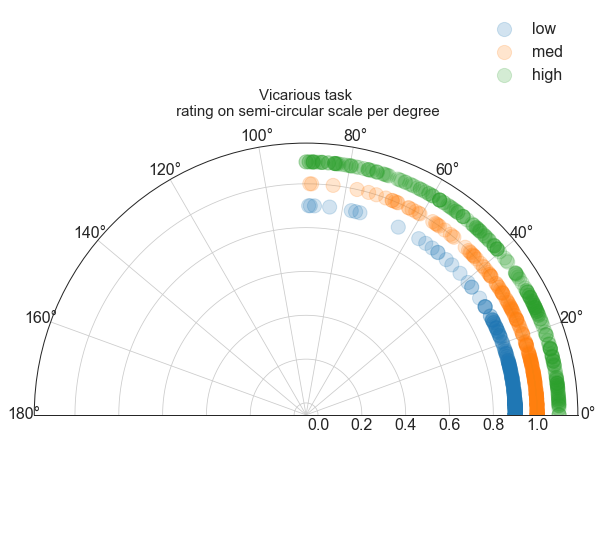

In [32]:
# Compute areas and colors

colors = result['theta']
result['newr'] = np.ones(result.r.shape)

area = 200 * result['newr']**2

# groups = result.groupby('administer')
group50 = result[result['param_administer_type'] == 'low']
group100 = result[result['param_administer_type'] == 'med']
group150 = result[result['param_administer_type'] == 'high']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
p50 = ax.scatter(group50.theta, np.ones(group50.newr.shape)*0.9,label='low', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p100 = ax.scatter(group100.theta, np.ones(group100.newr.shape),label='med', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p150 = ax.scatter(group150.theta, np.ones(group150.newr.shape)*1.1,label='high', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
figure_title = "Vicarious task\n rating on semi-circular scale per degree"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

## participant mean

In [29]:
group_mean = result.groupby(['param_administer_type','sub_num']).mean().reset_index()

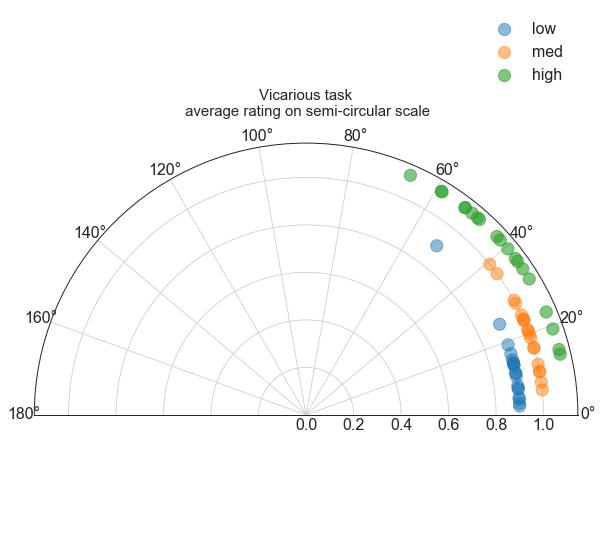

In [31]:

colors = group_mean['theta']
group_mean['newr'] = np.ones(group_mean.r.shape)
# area = 200 * result['newr']**2
area = 150 * group_mean['newr']**2


# groups = group_mean.groupby('administer')

group_mean_50 = group_mean[group_mean['param_administer_type'] == 'low']
group_mean_100 = group_mean[group_mean['param_administer_type'] =='med']
group_mean_150 = group_mean[group_mean['param_administer_type'] =='high']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
# for name, group in groups:
#     ax.scatter(group.theta, group.newr_random,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# ax.legend()
#  marker='o', linestyle='', ms=12,
figure_title = "Vicarious task\n average rating on semi-circular scale"
plt.text(0.5,0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)


p50 = ax.scatter(group_mean_50.theta, np.ones(group_mean_50.newr.shape)*0.9,label='low', alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p100 = ax.scatter(group_mean_100.theta, np.ones(group_mean_100.newr.shape),label='med', alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p150 = ax.scatter(group_mean_150.theta, np.ones(group_mean_150.newr.shape)*1.1,label='high', alpha=0.60, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()